# Importing Libraries

In [2]:
#installing nlp packages
!pip install nlp

In [5]:
%matplotlib inline

In [6]:
#importing numpy
import numpy as np

In [8]:
#installing tensorflow packages
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=75e69ab97162c1474bb51960b7016485deabc9a49d8f55e23b30471b04e4cc08
  Stored in directory: c:\users\vivobook\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [9]:
#importing tensorflow
import tensorflow as tf

In [10]:
#importing matplolib
import matplotlib.pyplot as plt

In [11]:
#importing random and nlp
import nlp
import random

In [14]:
#to plot the validation accuracy and validation loss of the training dataset after trainig models
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [12]:
#plot the confustion matrix calculted for predictions against teh true outputs   
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.0


# Importing dataset

In [15]:
#Importing the dataset
data = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to C:\Users\VivoBook\.cache\huggingface\datasets\emotion\default\0.0.0\84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [16]:
#printing the dataset summary
data

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [17]:
#getting the train,test,validation datasets sepeartely
train = data['train']
val=data['validation']
test=data['test']

In [18]:
#defining a function to get tweets
def GetTweet(A):
  #extracting tweets
  tweets = [x['text'] for x in A]
  #extracting labels
  labels = [x['label'] for x in A]
  return tweets,labels

In [27]:
#getting the tweets for train datatset
tweets,labels = GetTweet(train)

In [20]:
#getting the first tweet
tweets[0],labels[0]

('i didnt feel humiliated', 'sadness')

In [21]:
#getting the tweets for test datatset
tweets,labels = GetTweet(test)
tweets[0],labels[0]

('im feeling rather rotten so im not very ambitious right now', 'sadness')

In [22]:
#getting the tweets for validation datatset
tweets,labels = GetTweet(val)
tweets[0],labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 'sadness')

# Tokenization

In [23]:
#importing the token
from  tensorflow.keras.preprocessing.text import Tokenizer

In [24]:
#Tokenizationj is the process of converting  words to numbers
#It will give each unique word a nunique number
#can set limit and ignore less used words
#oov meansd out of vocublary & num_words commonly used words
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

In [25]:
#mapping the tokenization to numeric values
tokenizer.fit_on_texts(tweets)

In [28]:
#numeric tokens for first tweet of train dataset
tokenizer.texts_to_sequences([tweets[0]])

[[2, 153, 3, 543]]

# Padding & Truncating

In [29]:
#as we need a fixed input shape we have to pad & truncate the generated sequences
#checking lengths of the tweets in the training set
lengths = [len(t.split(' ')) for t in tweets]

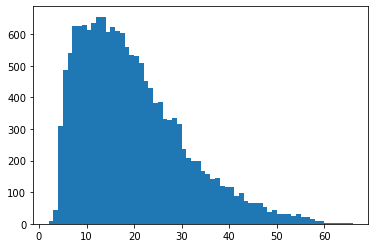

In [30]:
#plot the lengths in histogram, bins is the limit
plt.hist(lengths,bins=len(set(lengths)))
plt.show()